# Gerry_William_Nanlohy_2440018854_LB01_COMP6587001 - Deep Learning_MID Number 1

1. Anatahita merupakan salah satu data analyst di sebuah perusahaan kartu kredit terbesar di Indonesia. Dia diminta untuk membuat sebuah aplikasi yang membantu perusahaan untuk menentukan apakah sebuah transaksi yang dilakukan seseorang adalah fraud atau tidak fraud. Tim data memberikan dataset yang dapat di download pada https://bit.ly/UTSDeepLearning, data tersebut membuang beberapa informasi penting seperti nama pengguna dan lain - lainnya. Buatlah arsitektur Back Propagation Neural Network (BPNN). Berikut adalah ketentuan yang perlu diperhatikan dalam pembuatan arsitektur BPNN.

***Import the required libraries***

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

***Reading dataset in the form of excel file with read_csv function from pandas library***

In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

a. Dataset yang diberikan memiliki beberapa problem, lakukan 
praproses data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa 
saja yang kalian temukan dari data yang diberikan, berikan penjelasan mengenai 
pendekatan apa yang kalian gunakan dan kenapa memilih pendekatan yang dipilih? 

***Show the top 5 data to ensure data can be displayed and run properly using head function***

In [ ]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,0.0
4,NaN,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,0.0


***Show the bottom 5 data to make sure the data can be displayed and run properly using tail function***

In [ ]:
dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
41369,1.341766,0.064070,-0.020255,-0.108298,-0.146895,-0.679384,0.041574,-0.186474,0.190224,-0.132543,0.0
41370,-1.075491,-0.437308,1.452632,-1.890234,-0.147365,-1.050495,0.232710,-0.063106,1.625540,-1.886182,0.0
41371,-6.465283,-8.156106,0.470071,1.373821,1.953312,-1.680574,-0.328556,0.110676,-0.633314,0.658678,0.0
41372,-1.117972,0.091144,1.975912,0.496904,0.998723,0.106063,-0.175904,0.411996,-0.951737,-0.198503,0.0
41373,1.136674,0.212562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Checking the dimensions of the data using the shape function***

***It can be seen that the data has 132283 rows with 11 columns***

In [ ]:
dataset.shape

(41374, 11)

***Returns description of the data in the DataFrame using fescribe function. If the DataFrame contains numerical data, the description contains these information for each column:***

1. ***count - The number of not-empty values***
2. ***mean - The average (mean) value***
3. ***std - The standard deviation***
4. ***min - the minimum value***
5. ***25% - The 25% percentile***
6. ***50% - The 50% percentile***
7. ***75% - The 75% percentile***
8. ***max - the maximum value***

In [ ]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
count,41372.000000,41370.000000,41369.000000,41367.000000,41367.000000,41372.000000,41369.000000,41369.000000,41368.000000,41370.000000,41373.000000
mean,-0.222901,0.037433,0.712263,0.186742,-0.234407,0.100041,-0.112064,0.043680,0.197198,-0.068290,0.002562
std,1.854752,1.600582,1.492689,1.399497,1.388216,1.309907,1.240382,1.212603,1.221345,1.120272,0.050552
min,-56.407510,-72.715728,-31.103685,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-7.175097,-14.166795,0.000000
25%,-0.974342,-0.532097,0.230027,-0.719257,-0.841888,-0.637821,-0.598382,-0.151580,-0.566165,-0.549717,0.000000
50%,-0.240918,0.095651,0.812154,0.185226,-0.271782,-0.156688,-0.073240,0.050012,0.075110,-0.128614,0.000000
75%,1.159393,0.741155,1.444505,1.070003,0.293719,0.486727,0.432645,0.318326,0.911063,0.382103,0.000000
max,1.960497,16.713389,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,12.701538,1.000000


***Get the informations about the dataset such as columns number, rows number, non-null count, data type using info function***

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41374 entries, 0 to 41373
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      41372 non-null  float64
 1   V2      41370 non-null  float64
 2   V3      41369 non-null  float64
 3   V4      41367 non-null  float64
 4   V5      41367 non-null  float64
 5   V6      41372 non-null  float64
 6   V7      41369 non-null  float64
 7   V8      41369 non-null  float64
 8   V9      41368 non-null  float64
 9   V10     41370 non-null  float64
 10  Class   41373 non-null  float64
dtypes: float64(11)
memory usage: 3.5 MB


***Checking the empty data using isna function***

In [ ]:
dataset.isna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
41369,False,False,False,False,False,False,False,False,False,False,False
41370,False,False,False,False,False,False,False,False,False,False,False
41371,False,False,False,False,False,False,False,False,False,False,False
41372,False,False,False,False,False,False,False,False,False,False,False


***Checking the summary of the number of each empty data using sum function***

In [ ]:
dataset.isna().sum()

V1       2
V2       4
V3       5
V4       7
V5       7
V6       2
V7       5
V8       5
V9       6
V10      4
Class    1
dtype: int64

***Show the summary of the number of each empty data in plot visualize using plot function. It can be seen in V1 there are 5 empty data, V2 has 4 empty data, V3 has 6 empty data, V4 has 7 empty data, V5 has 6 empty data, V6 has 1 empty data, V7 has 5 empty data, V8 has 6 empty data , V9 there are 8 empty data, V10 there are 5 empty data, and in the class column there are 0 empty data.***

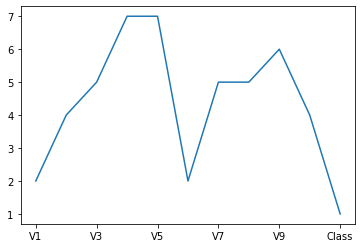

In [ ]:
dataset.isna().sum().plot()

***Checking the amount of each label according to the target by counting each true and false in the column using the value_counts function***

In [ ]:
dataset['Class'].value_counts()

0.0    41267
1.0      106
Name: Class, dtype: int64

***Declare sum variable to perform comparison calculations to determine whether the data is balanced or unbalanced by adding values 0 and 1***

In [ ]:
sum = 284315+492

***Then each value is divided by the sum  to find out how many percentages 0 and 1 values labels with the sum variable***

***It can be seen that the dataset is not balanced when viewed from the comparison of the labels. Where the model can predict the value of 1 more than
a value of 0 which will cause a bias in subsequent predictions***

In [ ]:
print('Persentase Label 0 :', 284315/sum)
print('Persentase Label 1 :', 492/sum)

Persentase Label 0 : 0.9982725143693799
Persentase Label 1 : 0.001727485630620034


***Checking the outliers in boxplot form using the seaborn function from sns library***

***It can be seen that all columns have the outliers as a pattern that is different from the normal pattern***

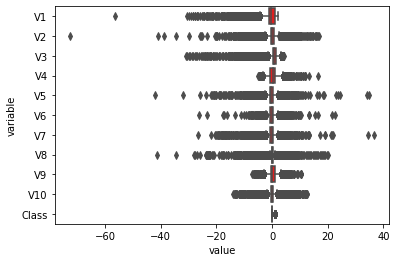

In [ ]:
sns.boxplot(x = "value",
            y = "variable",
            color = 'red',
            orient = 'h',
            data = pd.melt(dataset))
plt.show()

***Replace each the empty data using the fillna function which is assigned a value of 0.***

In [ ]:
dataset = dataset.fillna(0)

***Recheck the summary of the sum of each empty data using sum function***

In [ ]:
dataset.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
Class    0
dtype: int64

***Show the summary of the number of each blank data in plot visualize using plot function***

***It can be seen on the plot where the dataset is clean now from the empty data***

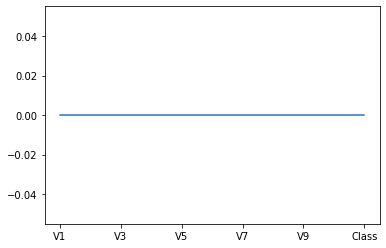

In [ ]:
dataset.isna().sum().plot()

***Checking the independent and the dependent variables in the data using pearson correlation method which will look for the highest correlation from the independent variable to the dependent variable***

***It can be seen that V4 is the column with the highest correlation and V10 is the lowest correlation***

In [ ]:
dataset[dataset.columns[0:]].corr(method = 'pearson')['Class'][:].sort_values()

V3      -0.387492
V7      -0.301032
V10     -0.294046
V1      -0.199699
V5      -0.184483
V9      -0.128274
V6      -0.091277
V8       0.155027
V2       0.179180
V4       0.203990
Class    1.000000
Name: Class, dtype: float64

***Checking the correlation in heatmap form using heatmap function from sns library***

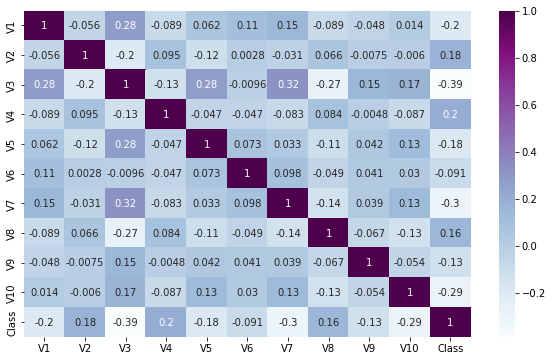

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = dataset.corr(), cmap = "BuPu", annot = True);

***Handling the outliers with IQR using the mean method where the system divides Q3 into 75 percent of the data and Q1 into 25 percent of the data. Then do the subtraction between Q3 - Q1. The results are then entered into the formula to determine the upper and lower limits. Then the calculation results will be calculated to take the mean value using the mean function.***

In [ ]:
def outliers_handle(dataset):
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3  -Q1
    UPPER = dataset[~(dataset>(Q3+1.5*IQR))].max()
    LOWER = dataset[~(dataset<(Q1-1.5*IQR))].min()

    dataset = np.where(dataset > UPPER, 
                dataset.mean(), 
                np.where(dataset < LOWER, dataset.mean(),
                dataset))
    return dataset

***Declare dataset_new variable to accomodate and applying the outliers handle function to the dependent variable and the independent variable with looping method***

In [ ]:
dataset_new = pd.DataFrame()
for i in dataset.iloc[:, :-1]:
    dataset_new[i] = outliers_handle(dataset[i])

***Exception For the Class column in the data that has been handled outliers will still have the same value as the original Class column using the copy function***

In [ ]:
dataset_new['Class'] = dataset['Class'].copy()

***Show the top 5 new data whose the outliers have been resolved using head function***

In [ ]:
dataset_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,0.0
4,0.000000,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,0.0


***Show the bottom 5 new data whose the outliers have been resolved using tail function***

In [ ]:
dataset_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
41369,1.341766,0.064070,-0.020255,-0.108298,-0.146895,-0.679384,0.041574,-0.186474,0.190224,-0.132543,0.0
41370,-1.075491,-0.437308,1.452632,-1.890234,-0.147365,-1.050495,0.232710,-0.063106,1.625540,-1.886182,0.0
41371,-0.222891,0.037430,0.470071,1.373821,1.953312,-1.680574,-0.328556,0.110676,-0.633314,0.658678,0.0
41372,-1.117972,0.091144,1.975912,0.496904,0.998723,0.106063,-0.175904,0.411996,-0.951737,-0.198503,0.0
41373,1.136674,0.212562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


***Checking the outliers whosse have been resolved in boxplot form using the seaborn function from sns library***

***It can be seen that all columns have the majority of outliers that have been successfully resolved***

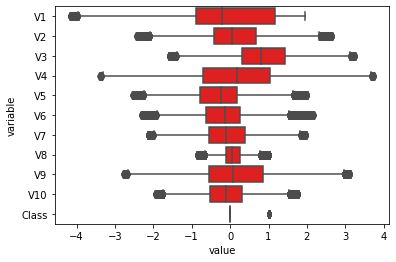

In [ ]:
sns.boxplot(x = "value",
            y = "variable",
            color = 'red',
            orient = 'h',
            data = pd.melt(dataset_new))
plt.show()

***Perform normalize the data using the MixMaxScaler method function from sklearn.preprocessing libray***

***Displaying independent variable (X) from the dataset***

***It can be seen the value of independent variable (X) has a data spread that is in the minus range. Therefore, data normalization is needed with MixMaxScaler method***

In [ ]:
X = dataset.iloc[:,:-1].values
print('X =')
print(X)

X =
[[-1.35980713 -0.07278117  2.53634674 ...  0.0986979   0.36378697
   0.09079417]
 [ 1.19185711  0.26615071  0.16648011 ...  0.08510165 -0.25542513
  -0.16697441]
 [-1.35835406 -1.34016307  1.77320934 ...  0.24767579 -1.51465432
   0.20764287]
 ...
 [-6.46528311 -8.15610582  0.47007148 ...  0.11067565 -0.63331439
   0.65867849]
 [-1.11797183  0.09114439  1.97591238 ...  0.41199608 -0.95173734
  -0.19850252]
 [ 1.13667441  0.212562    0.         ...  0.          0.
   0.        ]]


***Displaying dependent variable (Y) from the dataset***

In [ ]:
Y = dataset.Class.values.astype(np.int64)
print('Y =')
print(Y)

Y =
[0 0 0 ... 0 0 0]


***Declare scaler variable to perform MixMaxScaler function from sklearn.preprocessing library by setting the feature_range so that the data spread is in the range values 0 and 1***

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

***Show the independent variable (X) which has been normalized by data using MinMaxScaler method***

***It can be seen that the spread of data on the value of the independent variable (X) has become 0 to 1 which means shows that the data distribution is normal.***

In [ ]:
print(X)

[[0.94311432 0.81229636 0.9555361  ... 0.67624243 0.42912624 0.53064657]
 [0.98683115 0.81608631 0.88822067 ... 0.67602132 0.39387962 0.5210528 ]
 [0.94313922 0.79812445 0.93385939 ... 0.67866515 0.32220213 0.53499551]
 ...
 [0.85564387 0.7219083  0.8968441  ... 0.67643722 0.37236952 0.55178239]
 [0.94725761 0.81412939 0.93961711 ... 0.68133737 0.35424433 0.51987937]
 [0.98588572 0.81548708 0.88349185 ... 0.67463738 0.40841886 0.52726734]]


b. Pisahkan dataset menjadi train, test dan validation set dengan 
ketentuan (80 train, 10 val, 10 test)

***Splitting the dataset by splitting the data into X_train, X_test, Y_train, Y_test, X_valid, and Y_valid with total train_size = 80%, test_size = 10%, and validation_size = 10%. So that they both have a size of 10% then test_size is divided by 2 again by 0.5 so that the final result is 10%***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, 
                                                    Y_test, 
                                                    test_size = 0.5)

***Show the results of splitting data which has been taken as 80% Train Set, 10% Test Set and  10% Validation Set from the dataset***

In [ ]:
print ('Train Set      : ', X_train.shape, Y_train.shape)
print ('Test Set       : ', X_test.shape, Y_test.shape)
print ('Validation Set : ', X_valid.shape, Y_valid.shape)

Train Set      :  (33099, 10) (33099,)
Test Set       :  (4137, 10) (4137,)
Validation Set :  (4138, 10) (4138,)


c. Buatlah arsitektur baseline dengan n nodes input layer, 2 buah 
hidden layer dengan banyak 𝟐 × 𝒏 nodes awal dan layer akhir banyak kelas nya
(𝒏, 𝟐 × 𝒏, 𝟐 × 𝒏, 𝒏𝒖𝒎_𝒄𝒍𝒂𝒔𝒔). Activation function untuk tiap layer menggunakan ReLU.


***Import the required libraries to carry out model development and data training using Torch library from PyTorch which has a function to develop and train neural networks using dynamic computing so that it is suitable for complex calculations***

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

***Perform data conversion by converting data into tensor form so the data can be read by the Torch function from PyTorch***

In [ ]:
class creditcard(Dataset):
  
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index])
    Y = torch.LongTensor(self.Y[index, None])
    return X, Y

  def __len__(self):
    return len(self.X)

***Declare train_ds and train_loader variables to perform the DataLoader module to load the shared data in batch form***

***Delacre the batch_size variable for determining by using trial and error. It can be seen, the batch_size have 17 used, which means that the data to be taken is used for the first 17 samples and then trained until it is finished and then returns to take the next 17 samples. Then later iterations used depend on the number of batch sizes and training data.***

In [ ]:
train_ds = creditcard(X_train, Y_train)
train_loader = DataLoader(train_ds, batch_size = 17, 
                             shuffle = False, num_workers = 0)

***Declare valid_ds and valid_loader to validate the DataLoader module to load the shared data in batch form***

In [ ]:
valid_ds = creditcard(X_valid, Y_valid)
valid_loader = DataLoader(valid_ds, batch_size = 17, 
                             shuffle = False, num_workers = 0)

Declare test_ds and test_loader to accomodate the results of the DataLoader module to load the shared data in batch form

In [ ]:
test_ds = creditcard(X_test, Y_test)
test_loader = DataLoader(test_ds, batch_size = 17, 
                            shuffle = False, num_workers = 0)

***Creating baseline architecture according to the problem which n nodes input layer, 2 hidden layers with many 𝟐 × nodes at the beginning and the end layer having many classes (𝒏, × , × , _𝒄𝒍𝒂𝒔𝒔).***

***The first step is to convert the input data to linear. Then the input layer itself will have a number of 10 according to the number of independent variables. Then the output will use the 2 x n formula in accordance with the desired question which means (2x10) which is as many as 20 of the 2 hidden layers. The output features produced later are 2.***

***The second step is to create an Activation function for each layer using ReLU. At this stage, a ReLU layer is created which changes every negative to 0. So, each independent variable that has a value of 0 or more will enter the ReLU layer.***

***The ;ast step after creating the ReLU layer, proceed with normalizing between layers of the Neural Network using batch normalization. The goal is that later there will be no overfitting which causes the training to be successful but the validation is not appropriate.***

In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 2) 
        self.bn1 = nn.BatchNorm1d(20)
        self.bn2 = nn.BatchNorm1d(20)
        self.bn3 = nn.BatchNorm1d(20)

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.relu(X)
        X = self.bn3(X)
        X = self.fc4(X)
        return X

***Declare net variable that have Net function then declare criterion variable to determining the Loss function using CrossEntropyLoss function because the loss function can measure performance for models that have an output probability between 0 and 1 and optimizer variable to determining the Optimizer function for optimize the data using Adam Optimizer function because it combines the best properties of the AdaGrad and RMSProp algorithms***

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

***Define the epoch where using 25 so the process doesn't take a long time and start to perform training data***

In [ ]:
epochs = 25
 
train_mean_losses = []
valid_mean_losses = []
valid_best_loss = np.inf

for i in range(epochs):  
    train_losses = []
    print("================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, Y_batch = batch_data
        optimizer.zero_grad()
        out = net(X_batch)
        loss = criterion(out, torch.squeeze (Y_batch))
        loss.backward()
        optimizer.step()
        train_losses.append(loss)

    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('Training Loss : {:10.8f}'.format(train_mean_loss))
    train_mean_losses.append(train_mean_loss)

    valid_losses = []
    with torch.set_grad_enabled(False):

        for iteration, batch_data in enumerate(valid_loader):
            X_batch, Y_batch = batch_data
            out = net(X_batch)
            loss = criterion(out, torch.squeeze (Y_batch))
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('Validation Loss : {:10.8f}'.format(valid_mean_loss))
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i

Epoch 0
Training Loss : 0.06829467
Validation Loss : 0.00726914
Epoch 1
Training Loss : 0.00610389
Validation Loss : 0.00613264
Epoch 2
Training Loss : 0.00534201
Validation Loss : 0.00564309
Epoch 3
Training Loss : 0.00484999
Validation Loss : 0.00541874
Epoch 4
Training Loss : 0.00478278
Validation Loss : 0.00853843
Epoch 5
Training Loss : 0.00522418
Validation Loss : 0.00589168
Epoch 6
Training Loss : 0.00468371
Validation Loss : 0.00774857
Epoch 7
Training Loss : 0.00423856
Validation Loss : 0.00660031
Epoch 8
Training Loss : 0.00383821
Validation Loss : 0.00636767
Epoch 9
Training Loss : 0.00367120
Validation Loss : 0.00551447
Epoch 10
Training Loss : 0.00336469
Validation Loss : 0.00789617
Epoch 11
Training Loss : 0.00333596
Validation Loss : 0.00581444
Epoch 12
Training Loss : 0.00305404
Validation Loss : 0.00819969
Epoch 13
Training Loss : 0.00292937
Validation Loss : 0.00533095
Epoch 14
Training Loss : 0.00257880
Validation Loss : 0.00720953
Epoch 15
Training Loss : 0.00291903

***Show the results of Epoch and Loss in graphic form using plot function from matplotlib library***

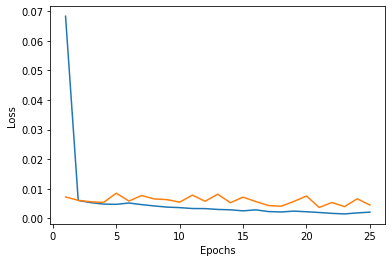

In [ ]:
plt.plot(range(1, epochs + 1),
         torch.tensor(train_mean_losses).detach().numpy())
plt.plot(range(1, epochs + 1), 
         torch.tensor(valid_mean_losses).detach().numpy())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

d. Setelah mengetahui hasil dari nomor (1c), perbaiki arsitektur pada 
nomor 1c untuk mendapatkan nilai akurasi maksimal yang kalian dapatkan (kalian dapat menambahkan atau mengurangi architecture, atau mengganti hyperparameter, atau menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan pendekatan yang kalian pilih.

***Perform the improvement by adding the output features to 2 with output 20 from 2 hidden layers and adding layers to 5 layers***

***The next step is to create an Activation function for each layer using ReLU. At this stage, a ReLU layer is created which changes every negative to 0. So, each independent variable that has a value of 0 or more will enter the ReLU layer.***

***The last step after creating the ReLU layer, proceed with normalizing between layers of the Neural Network using batch normalization. The goal is that later there will be no overfitting which causes the training to be successful but the validation is not appropriate.***

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 2)
        self.bn1 = nn.BatchNorm1d(20)
        self.bn2 = nn.BatchNorm1d(20)
        self.bn3 = nn.BatchNorm1d(20)
        self.bn4 = nn.BatchNorm1d(20)

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.relu(X)
        X = self.bn3(X)
        X = self.fc4(X)
        X = self.bn4(X)
        X = self.fc5(X)
        return X

***Declare net2 variable that have Net function then declare criterion variable to determining the Loss function using CrossEntropyLoss function because the loss function can measure performance for models that have an output probability between 0 and 1 and optimizer variable to determining the Optimizer function for optimize the data using SGD Optimizer function because can generalize better than other optimizers so in the end performance becomes better by updating the parameter at each time step t***

In [ ]:
net2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net2.parameters(), lr = 0.01)

***Define the epoch where using 20 so the process doesn't take a long time and start to perform training data***

In [ ]:
epochs = 20
 
train_mean_losses = []
valid_mean_losses = []
valid_best_loss = np.inf

for i in range(epochs):
    train_losses2 = []
    print("================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, Y_batch = batch_data
        optimizer.zero_grad()
        out = net2(X_batch)
        loss = criterion(out, torch.squeeze (Y_batch))
        loss.backward()
        optimizer.step()
        train_losses2.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses2))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    train_mean_losses.append(train_mean_loss)
    
    valid_losses2 = []
    with torch.set_grad_enabled(False):

        for iteration, batch_data in enumerate(valid_loader):
            X_batch, Y_batch = batch_data
            out = net2(X_batch)
            loss = criterion(out, torch.squeeze (Y_batch))
            valid_losses2.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses2))
        print('validation Loss : {:10.8f}'.format(valid_mean_loss))
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net2.state_dict(), "best_model2.pth")
            best_epoch = i

Epoch 0
training loss: 0.07827875
validation Loss : 0.01543591
Epoch 1
training loss: 0.01084116
validation Loss : 0.00890127
Epoch 2
training loss: 0.00729251
validation Loss : 0.00690283
Epoch 3
training loss: 0.00590614
validation Loss : 0.00651696
Epoch 4
training loss: 0.00513275
validation Loss : 0.00628215
Epoch 5
training loss: 0.00465584
validation Loss : 0.00632620
Epoch 6
training loss: 0.00423699
validation Loss : 0.00612419
Epoch 7
training loss: 0.00390893
validation Loss : 0.00617274
Epoch 8
training loss: 0.00374411
validation Loss : 0.00621902
Epoch 9
training loss: 0.00384037
validation Loss : 0.00629751
Epoch 10
training loss: 0.00363216
validation Loss : 0.00492707
Epoch 11
training loss: 0.00316742
validation Loss : 0.00561027
Epoch 12
training loss: 0.00284821
validation Loss : 0.00496964
Epoch 13
training loss: 0.00267342
validation Loss : 0.00478384
Epoch 14
training loss: 0.00248666
validation Loss : 0.00475576
Epoch 15
training loss: 0.00232436
validation Loss

***Show the results of Epoch and Loss in graphic form using plot function from matplotlib library***

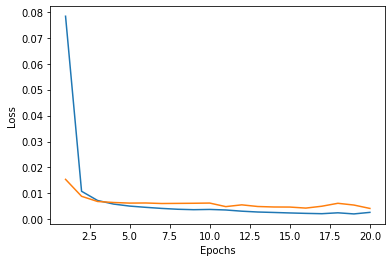

In [ ]:
plt.plot(range(1, epochs + 1),
         torch.tensor(train_mean_losses).detach().numpy())
plt.plot(range(1, epochs + 1),
         torch.tensor(valid_mean_losses).detach().numpy())
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

e. Analisis performa dari test set dengan mencari nilai accuracy, 
precision, recall dan F1-Score

***Import the required library to Find Accuracy, Precision, Recall and F1-Score Values from sklearn.metrics libray***

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

***Perform load model to calculate the results of accuracy, precision, recall, and f1-score values using load_state_dict function to match the model data with best_model.pth***

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

***Perform the calculation using confusion matrix. Where at the initial stage, a test prediction is calculated between 0 and 2 because the first model output features is 2. Then looping is used to check between batch x and batch y. This check aims to find out how much the output of the predicted class and ground truth is.***

In [ ]:
test_predictions = np.empty((0,2))

with torch.no_grad():

    for iteration, batch_data in enumerate(test_loader):
        X_batch, Y_batch = batch_data        
        out = net(X_batch)
        test_predictions = np.append(test_predictions, out.numpy(), axis = 0)
        
test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis = 1)

***Show the result of Predicted Class using test_predictions variable***

In [ ]:
print("================================")
print("Predicted Class : ")
print(test_predictions)

Predicted Class : 
[0 0 0 ... 0 0 0]


***Show the result of Ground Truth using Y_test variable***

In [ ]:
print("================================")
print("Ground Truth : ")
print(Y_test)

Ground Truth : 
[0 0 0 ... 0 0 0]


***Show the result of Confussion Matrix using Y_test and test_predictions variables***

In [ ]:
print("================================")
print("Confussion Matrix : ")
print(confusion_matrix(Y_test, test_predictions))

Confussion Matrix : 
[[4125    1]
 [   3    8]]


***Show the result of Accuration using the calculation of accuracy variable***

In [ ]:
print("================================")
accuracy = accuracy_score(Y_test, test_predictions)
print("Accuration : {}".format(accuracy))

Accuration : 0.9990331157843848


***Show the result of F1 Score using the calculation of f1 variable***

In [ ]:
print("================================")
f1 = f1_score(Y_test, test_predictions, average = 'macro')
print("F1 Score : ", f1)

F1 Score :  0.8997576932396414


***Show the result of Classification Report using Y_test and test_predictions variables***

In [ ]:
print("================================")
print("Classification Report : ")
print(classification_report(Y_test, test_predictions))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4126
           1       0.89      0.73      0.80        11

    accuracy                           1.00      4137
   macro avg       0.94      0.86      0.90      4137
weighted avg       1.00      1.00      1.00      4137



***Perform the second load model to calculate the results of accuracy, precision, recall, and f1-score values using load_state_dict function to match the model data with best_model2.pth***

In [ ]:
net2.load_state_dict(torch.load("best_model2.pth"))

<All keys matched successfully>

***Perform the calculation using confusion matrix. Where at the initial stage, the test prediction calculation is carried out between 0 and 3 because the first model output features is 3. Then looping is used to check between batch x and batch y. This check aims to find out how much the output of the predicted class and ground truth is.***

In [ ]:
test_predictions = np.empty((0,2))

with torch.no_grad():

    for iteration, batchdata in enumerate(test_loader):
        X_batch, Y_batch = batchdata        
        out = net2(X_batch)
        test_predictions = np.append(test_predictions, out.numpy(), axis = 0)
        
test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis = 1)

***Show the second result of Predicted Class using test_predictions variable***

In [ ]:
print("================================")
print("Predicted Class : ")
print(test_predictions)

Predicted Class : 
[0 0 0 ... 0 0 0]


***Show the second result of Ground Truth using Y_test variable***

In [ ]:
print("================================")
print("Ground Truth:")
print(Y_test)

Ground Truth:
[0 0 0 ... 0 0 0]


***Show the second result of Confussion Matrix using Y_test and test_predictions variables***

In [ ]:
print("================================")
print("Confussion Matrix : ")
print(confusion_matrix(Y_test, test_predictions))

Confussion Matrix : 
[[4124    2]
 [   5    6]]


***Show the second result of Accuration using the calculation of accuracy variable***

In [ ]:
print("================================")
accur = accuracy_score(Y_test, test_predictions)
print("Accuration : {}".format(accur))

Accuration : 0.9983079526226735


***Show the second result of F1 Score using the calculation of f1 variable***

In [ ]:
print("================================")
f1 = f1_score(Y_test, test_predictions, average = 'macro')
print("F1 Score : ", f1)

F1 Score :  0.815365488220855


***Show the second result of Classification Report using Y_test and test_predictions variables***

In [ ]:
print("================================")
print("Classification Report : ")
print(classification_report(Y_test, test_predictions))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4126
           1       0.75      0.55      0.63        11

    accuracy                           1.00      4137
   macro avg       0.87      0.77      0.82      4137
weighted avg       1.00      1.00      1.00      4137



***Conclusion***

1. There are empty data in columns or rows in the dataset.

2. There are outliers in the dataset due to the slight variation in the data.

3. There is a correlation assessment by separating the dependent variable (X) and the independent variable (Y) to see the correlation between columns and the Pearson correlation because this correlation only involves 1 each for the dependent variable (X) and the independent variable (Y) where the results can show a better correlation so that the visualization with HeatMap becomes clearer.

4. There is data normalization where the data distribution is not in the range 0 and by using the MinMaxScaler method to make the data range within the range of values ​​0 and 1 by reducing the minimum data then divided by the maximum data reduced by the minimum data so that the results are better because they are in the range of values ​​0 and 1.


5. There are Predicted Class and Ground Truth which have the same output value.

6. There is a Confusion Matrix which has a True Positive value of 28425, a False Negative of 13, a False Positive of 5, and a True Negative of 38 with an accuracy of 99%.

7. There is an F1 Score that has a value of 90%.

8. There is a Classification Report as a summary of the respective values ​​of Precision, Recall, F1-score, and Support from target data 0 and 1 as well as the average and also the average weight of each variable.

9. There is an increase in value between the first model and the second model due to the use of the optimizer and the different number of layers.

10. The results of this case study problem can still be improved in accuracy depending on how we conduct data training and manipulate hyperparameters and parameters.

***Reference***

https://medium.com/@uulwake/kesalahan-scaling-data-di-machine-learning-menggunakan-scikit-learn-7b88f2fbaec

https://medium.com/@uulwake/apa-pentingnya-scaling-data-di-machine-learning-91ba0caf1a43

https://pacmann.io/blog/cara-mendeteksi-dan-menangani-outlier-saat-melakukan-data-analysis/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
https://id.wikihow.com/Menentukan-IQR


https://kotakode.com/pertanyaan/2416/Penentuan-Epoch-dan-Batch-size-pada-klasifikasi-CNN https://imam.digmi.id/post/memahami-epoch-batch-size-dan-iteration/

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://www.tutorialspoint.com/how-to-apply-linear-transformation-to-the-input-data-in-pytorch

https://jurnal.goretanpena.com/index.php/JSSR/article/download/789/738

https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e